In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
!unzip 'traffic-violations-in-usa.zip'

Archive:  traffic-violations-in-usa.zip
  inflating: Traffic_Violations.csv  


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv('Traffic_Violations.csv')
df.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1018634, 35)

In [0]:
df['timestamp'] = pd.to_datetime(df['Time Of Stop'])

In [0]:
df['minutes'] = df['timestamp'].dt.hour * 60 + df['timestamp'].dt.minute

In [0]:
minutes = df.minutes.sort_values()

In [0]:
#Total minutes in a day
total_minutes = 24 * 60

In [0]:
ecdf = np.zeros(total_minutes)

In [0]:
for minute in minutes:
  ecdf[minute] += 1 / df.shape[0]

In [0]:
for i in range(1, total_minutes):
  ecdf[i] += ecdf[i-1]

In [0]:
hcdf = np.arange(total_minutes) * (1 / total_minutes)

Text(0,0.5,'Probability')

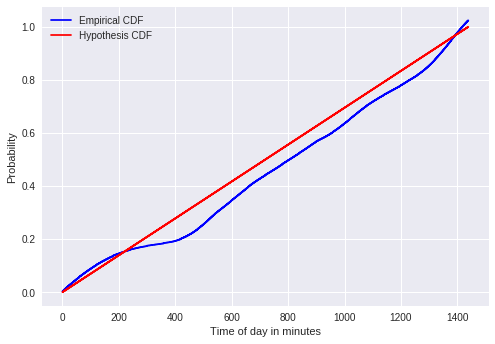

In [0]:
plt.step(np.arange(total_minutes), ecdf, 'b', label='Empirical CDF')
plt.step(np.arange(total_minutes), hcdf, 'r', label='Hypothesis CDF')
plt.legend()
plt.xlabel('Time of day in minutes')
plt.ylabel('Probability')

#KS Test

## Since there are no assumptions for KS test, we can apply the test

In [0]:
max_diff = np.max(np.abs(ecdf - hcdf))
max_diff

0.09665135558448287

## Since max diff between Empirical CDF and CDF of hypothesis is less that 0.15, we do not reject the null hypothesis

#KS Test for Male

In [0]:
male = df[df.Gender == 'M']
male.shape

(681330, 38)

Text(0.5,1,'Male')

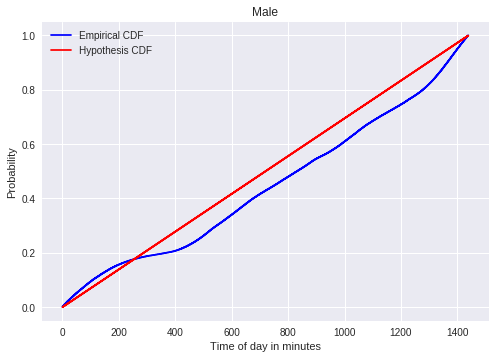

In [0]:
minutes = np.sort(male.minutes)
ecdf = np.zeros(total_minutes)
for minute in minutes:
  ecdf[minute] += 1 / male.shape[0]
for i in range(1, total_minutes):
  ecdf[i] += ecdf[i-1]

hcdf = np.arange(total_minutes) * (1 / total_minutes)


plt.step(np.arange(total_minutes), ecdf, 'b', label='Empirical CDF')
plt.step(np.arange(total_minutes), hcdf, 'r', label='Hypothesis CDF')
plt.legend()
plt.xlabel('Time of day in minutes')
plt.ylabel('Probability')
plt.title("Male")

In [0]:
max_diff = np.max(np.abs(ecdf - hcdf))
max_diff

0.08957734015332552

## Since max diff between Empirical CDF and CDF of hypothesis is less than 0.15, we do not reject the null hypothesis

#KS Test for Female

In [0]:
female = df[df.Gender == 'F']
female.shape

(336161, 38)

Text(0.5,1,'Female')

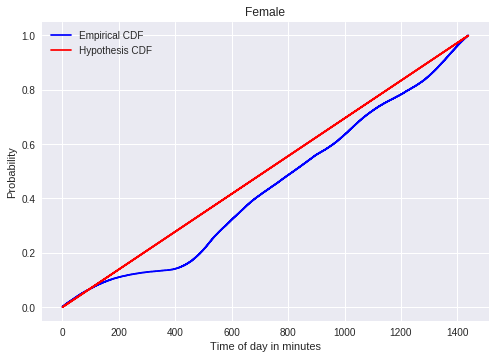

In [0]:
minutes = np.sort(female.minutes)
ecdf = np.zeros(total_minutes)
for minute in minutes:
  ecdf[minute] += 1 / female.shape[0]
for i in range(1, total_minutes):
  ecdf[i] += ecdf[i-1]

hcdf = np.arange(total_minutes) * (1 / total_minutes)


plt.step(np.arange(total_minutes), ecdf, 'b', label='Empirical CDF')
plt.step(np.arange(total_minutes), hcdf, 'r', label='Hypothesis CDF')
plt.legend()
plt.xlabel('Time of day in minutes')
plt.ylabel('Probability')
plt.title("Female")

In [0]:
max_diff = np.max(np.abs(ecdf - hcdf))
max_diff

0.14745773065419357

## Since max diff between Empirical CDF and CDF of hypothesis is greater than 0.15, we reject the null hypothesis

#Permutation Test

In [17]:
df.columns

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type', 'Geolocation',
       'timestamp', 'minutes'],
      dtype='object')

In [18]:
df.SubAgency.unique()

array(['3rd district, Silver Spring', '2nd district, Bethesda',
       '5th district, Germantown',
       '6th district, Gaithersburg / Montgomery Village',
       '4th district, Wheaton', '1st district, Rockville',
       'Headquarters and Special Operations'], dtype=object)

In [24]:
ss = df[df.SubAgency == '3rd district, Silver Spring']
wh = df[df.SubAgency == '4th district, Wheaton']
print(ss.shape, wh.shape)

(212326, 37) (248696, 37)


In [0]:
union = df[(df.SubAgency == '3rd district, Silver Spring') | (df.SubAgency == '4th district, Wheaton')]
assert union.shape[0] == ss.shape[0] + wh.shape[0]

In [0]:
# Average number of citations on each minute in  Silver Spring district
spm = ss[ss['Violation Type'] == 'Citation'].groupby('minutes').Latitude.count() / 1822
# Average number of citations on each minute in  Wheaton district
wpm = wh[wh['Violation Type'] == 'Citation'].groupby('minutes').Latitude.count() / 1822

In [30]:
T_obs = np.abs(np.average(spm) - np.average(wpm))
T_obs

0.0011251372118550942

In [0]:
spm = np.array(spm)
wpm = np.array(wpm)

P value = 0.01
Reject


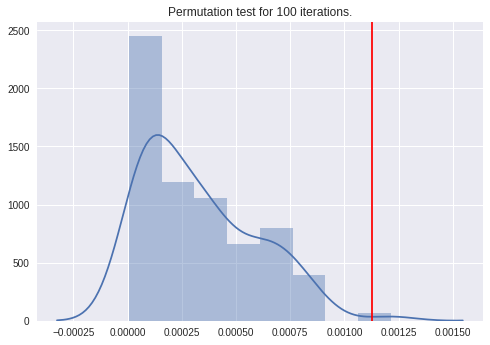

In [107]:
def permutation_test(num_perm, threshold, t_obs):
  results = []
  for i in range(num_perm):
    num_values_to_swap = np.random.randint(0, 1440)
    # randomly select the minutes of day for which the values must be swapped
    indices_to_swap = np.random.randint(0, 1440, num_values_to_swap)
    # swapping all the values for a given minute of day and then calculating average is essentially the same as swapping the average values per minute directly
    for i in indices_to_swap:
      wpm[i], spm[i] = spm[i], wpm[i]
    results.append(np.abs(np.average(spm) - np.average(wpm)))
    
  num_greater = 0
  for res in results:
    if res > t_obs:
      num_greater += 1
  p_val = (1.0 / num_perm) * num_greater
  
  print(f"P value = {p_val}")
  
  if p_val <= threshold:
    print('Reject')
  else :
    print('Accept')
    
  ax = sns.distplot(results)
  plt.axvline(x=t_obs, color='r')
  plt.title(f"Permutation test for {num_perm} iterations.")
  plt.savefig(f"gdrive/Team Drives/CSE544: Prob Stat Project/p_test_{num_perm}_iterations")
  

permutation_test(100, 0.05, T_obs)

In [0]:
results

[0.0006746249542627231,
 0.0004581351384315216,
 0.00042306988657153655,
 0.000772960117087447,
 0.0009147457006952048,
 -0.0005214050493962674,
 0.0005130198804732325,
 -0.0004375533601658696,
 -0.00043145505549457147,
 -0.00017227710696426923,
 -0.0008164105378704808,
 -0.00016846566654469403,
 -0.0005168313208927869,
 -0.0007295096963044201,
 -0.00025765337236248465,
 -0.000275948286376379,
 -9.833516282473781e-05,
 0.00014940846444688738,
 -0.0006715758019270601,
 -0.0008636723990730621,
 -0.0008293694352969963,
 -0.0008377546042200243,
 -0.0010961702646664281,
 -0.0006212647883888298,
 -0.0006258385168923103,
 -0.00023402244176118359,
 0.00013797414318819645,
 0.00023935845834858333,
 -0.0001326381266007967,
 0.0001494084644468735,
 0.0007470423222344161,
 0.0006959690206122734,
 5.412245395779863e-05,
 0.00045889742651543386,
 -0.00014254787169167005,
 -0.00014026100743993325,
 0.0002081046469081596,
 -0.00021648981583120147,
 -0.00020048176606903695,
 -0.0005945847054518796,
 -0

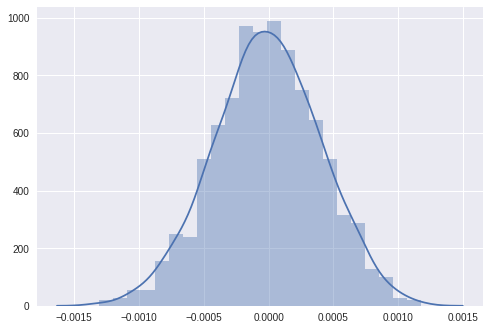

In [0]:
import seaborn as sns
sns.distplot(results)

In [0]:
np.average(results)

NameError: ignored

# Logistic Regression

Date Of Stop                                                      09/24/2013
Time Of Stop                                                        17:11:00
Agency                                                                   MCP
SubAgency                                        3rd district, Silver Spring
Description                DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...
Location                                                     8804 FLOWER AVE
Latitude                                                                 NaN
Longitude                                                                NaN
Accident                                                                  No
Belts                                                                     No
Personal Injury                                                           No
Property Damage                                                           No
Fatal                                                                     No

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type', 'Geolocation',
       'timestamp', 'minutes'],
      dtype='object')

In [0]:
bool_cols = ['Accident', 'Belts', 'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
             'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'Contributed To Accident']
for col in bool_cols:
  print(df[col].unique())

for col in bool_cols:
  df[col] = df[col].apply(lambda x: x == "Yes")

['No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


In [0]:
df['Gender'] = df.Gender.apply(lambda x: x == 'M')

array([False])

# Injury vs Features

In [0]:
# counts = df[df["Accident"] == "Yes"][['Accident', 'minutes']].groupby('minutes').count().reset_index('minutes')
# counts.columns = ['minutes', 'counts']
# counts.counts.plot(kind='line')
# df[df["Violation Type"] == "Yes"].shape
df.groupby('Violation Type').Accident.count()

Violation Type
Citation    497615
ESERO        51123
SERO           922
Warning     468974
Name: Accident, dtype: int64

In [0]:
df[df["Violation Type"] == 'Citation'].shape

(497615, 37)

In [0]:
df.shape

(1018634, 37)

In [0]:
counts.plot(kind = 'scatter', x='minutes', y='Belts')
# counts.Belts.plot(kind='line')

NameError: ignored

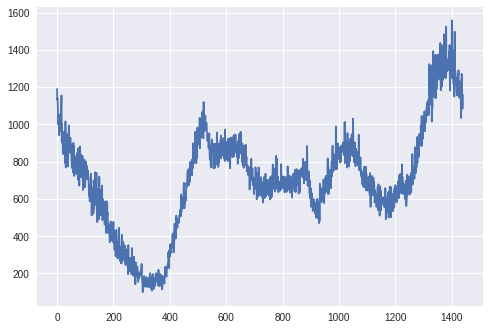

In [0]:
# counts.plot(kind = 'scatter', x='minutes', y='counts')
counts.counts.plot(kind='line')

In [0]:
def linear_regression(x,y):
    if len(x.shape) < 2:
      x = np.atleast_2d(x).T
    if len(x.shape) < 2:
      y = np.atleast_2d(y).T
    F = np.linalg.inv(np.dot(x.T,x))
    S = np.dot(x.T,y)
    return np.dot(F,S)

def get_prediction(x, y, beta):
#   beta = linear_regression(x, y)
  if len(x.shape) < 2:
    x = np.atleast_2d(x).T
  pred = np.dot(x, beta)
  return pred

array(['Citation', 'Warning', 'ESERO', 'SERO'], dtype=object)

In [83]:
# counts = train_df[train_df["Violation Type"] == 'Citation'][['minutes', 'Date Of Stop', 'Accident', 'Belts', 'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License', 'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'Contributed To Accident', 'Gender'
# ]]

# counts = counts.groupby('minutes')

# counts = counts.agg({'Date Of Stop': 'count', 'Accident': 'sum', 'Belts': 'sum', 'Personal Injury': 'sum','Property Damage': 'sum', 'Fatal': 'sum', 'Commercial License': 'sum', 'HAZMAT': 'sum', 'Commercial Vehicle': 'sum', 'Alcohol': 'sum', 'Work Zone': 'sum', 'Contributed To Accident':'sum', 'Gender': 'sum'}).reset_index('minutes')
# counts
# counts.columns = ['minutes', 'counts', 'Accident', 'Belts', 'Personal Injury',
#        'Property Damage', 'Fatal', 'Commercial License', 'HAZMAT',
#        'Commercial Vehicle', 'Alcohol', 'Work Zone',
#        'Contributed To Accident', 'Gender']


# num_days = len(train_df["Date Of Stop"].unique())
# for col in counts.columns[1:]:
#   counts[col] = counts[col] / num_days

,minutes,Date Of Stop,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Contributed To Accident,Gender
0,0,457,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoN...,NoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoN...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoN...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoN...,MMMMMMMMMMMMFFFMMMMFFFFMMFMMFFFFFFMFMFMFFMMFFM...
1,1,430,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,MFMMMMMMMMMMMMFFFMMFFFFFMMMFFMMMMMMMMMMMMMMMMM...
2,2,377,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,YesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoN...,MFMMMMMMMMMMMMMMMMMMFMMMMMFMFMFMMFFMFFMMFMMFMM...
3,3,376,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesNoYesYesNo...,MFFMFMMMMFMFMMMMFMMFMMMMMMMMMMMMMMMMMMMMMMMMMM...
4,4,368,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoN...,MMMMMMMMMMMMMMMMMMMMMMMFMFMFMFMMMMMFMFMMFMMMMM...
5,5,382,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoN...,MMMFFFMFMMFMFMMFMFFFMMMMMMMMMMMMMMMMMMMMMMFMFF...
6,6,338,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoN

In [0]:
counts.shape

(1440, 14)

In [0]:
counts.drop('Accident', axis=1, inplace=True)

In [0]:
plt.figure(figsize=(20, 4))
df.groupby('Date Of Stop').Accident.count().plot(kind='scatter', x='Date of Stop', y='minutes')

minutes                    0
Date Of Stop               0
Accident                   0
Belts                      0
Personal Injury            0
Property Damage            0
Fatal                      0
Commercial License         0
HAZMAT                     0
Commercial Vehicle         0
Alcohol                    0
Work Zone                  0
Contributed To Accident    0
dtype: int64

In [0]:
pred = get_prediction(np.sin(counts.minutes), counts.counts)

In [0]:
counts.columns

Index(['minutes', 'counts', 'Accident', 'Belts', 'Personal Injury',
       'Property Damage', 'Fatal', 'Commercial License', 'HAZMAT',
       'Commercial Vehicle', 'Alcohol', 'Work Zone', 'Contributed To Accident',
       'Gender'],
      dtype='object')

In [0]:
test_counts = test_df[test_df["Violation Type"] == 'Citation'][['minutes', 'Date Of Stop', 'Accident', 'Belts', 'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License', 'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'Contributed To Accident', 'Gender'
]]

test_counts = test_counts.groupby('minutes')

test_counts = test_counts.agg({'Date Of Stop': 'count', 'Accident': 'sum', 'Belts': 'sum', 'Personal Injury': 'sum','Property Damage': 'sum', 'Fatal': 'sum', 'Commercial License': 'sum', 'HAZMAT': 'sum', 'Commercial Vehicle': 'sum', 'Alcohol': 'sum', 'Work Zone': 'sum', 'Contributed To Accident':'sum', 'Gender': 'sum'}).reset_index('minutes')

test_counts.columns = ['minutes', 'counts', 'Accident', 'Belts', 'Personal Injury',
       'Property Damage', 'Fatal', 'Commercial License', 'HAZMAT',
       'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Contributed To Accident', 'Gender']


num_days = len(test_df["Date Of Stop"].unique())
for col in test_counts.columns[1:]:
  test_counts[col] = test_counts[col] / num_days

In [0]:
test_counts.shape

(1440, 14)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


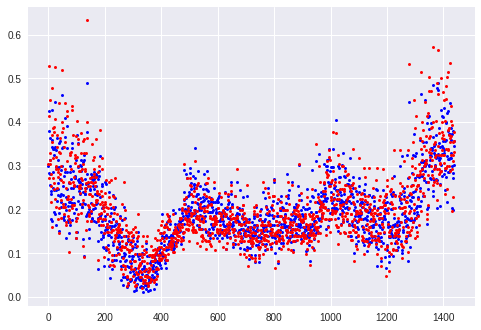

In [0]:
# x = pd.DataFrame({
#     'bias': np.ones(counts.shape[0]),
#     'minutes':counts.minutes,
#     'p2': counts.minutes ** 2,
#     'p3': counts.minutes ** 3,
#     'p5': counts.minutes ** 5
# })

# y = pd.DataFrame({'counts': counts.counts/1822})
# zip[np.ones(df.shape[0]), counts.minutes]

x = counts[["Gender"
       ]]

# x = counts[['minutes', 'Gender']]
#'Commercial License' , 'Commercial Vehicle'

x['bias'] = np.ones(counts.shape[0])
y = counts.counts

beta = linear_regression(x,y)

test_x = test_counts[["Gender"]]

test_x['bias'] = np.ones(counts.shape[0])
test_y = test_counts.counts

pred = get_prediction(test_x, test_y,beta)

plt.plot(test_counts.minutes, test_y, 'bo', markersize=3)

plt.plot(test_counts.minutes, pred, 'ro', markersize=3)

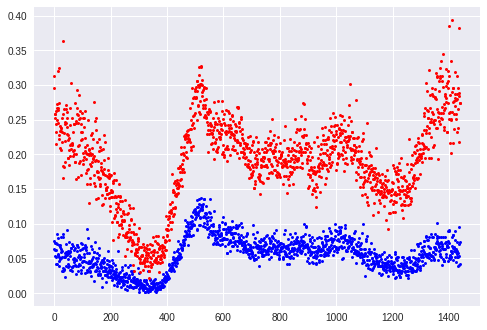

In [0]:
plt.plot(counts.minutes, counts.Gender, 'bo', markersize=3)

plt.plot(counts.minutes, counts.counts, 'ro', markersize=3)

In [0]:
counts[["counts","Gender"]]

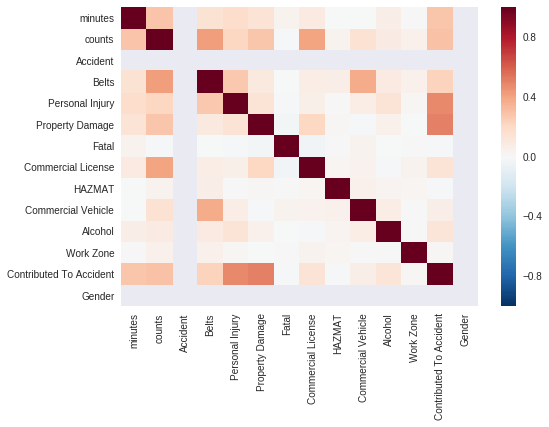

In [0]:
import seaborn as sns
sns.heatmap(counts.corr())

In [0]:
df['Date Of Stop'] = pd.to_datetime(df['Date Of Stop'])

In [0]:
df.shape

(1018634, 37)

In [0]:
train_df = df[df['Date Of Stop']< "2015-12-29"]
test_df = df[df['Date Of Stop']>= "2015-12-29"]

In [0]:
dates = df['Date Of Stop']

In [0]:
# dates = dates['Date Of Stop'].unique().sort_values().reset_index()
dates = np.sort(dates.unique())

In [0]:
dates[1458]

numpy.datetime64('2015-12-29T00:00:00.000000000')

###hypothesis:  linear regression

In [0]:
df['Date Of Stop'] = pd.to_datetime(df['Date Of Stop'])

In [112]:
df.dtypes

Date Of Stop               datetime64[ns]
Time Of Stop                       object
Agency                             object
SubAgency                          object
Description                        object
Location                           object
Latitude                          float64
Longitude                         float64
Accident                           object
Belts                              object
Personal Injury                    object
Property Damage                    object
Fatal                              object
Commercial License                 object
HAZMAT                             object
Commercial Vehicle                 object
Alcohol                            object
Work Zone                          object
State                              object
VehicleType                        object
Year                              float64
Make                               object
Model                              object
Color                             

In [0]:
#convertng features to boolean values 
bool_cols = ['Accident', 'Belts', 'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
             'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'Contributed To Accident']

# for col in bool_cols:
#   print(df[col].unique())

for col in bool_cols:
  df[col] = df[col].apply(lambda x: x == "Yes")

df['Gender'] = df.Gender.apply(lambda x: x == 'M') #We have considered male as True and Female and unknown as False

In [0]:
#splitting into training and testing data (roughly 80:20 split)
train_df = df[df['Date Of Stop']< "2015-12-29"]
test_df = df[df['Date Of Stop']>= "2015-12-29"]

In [117]:
print(df.shape,train_df.shape,test_df.shape)

(1018634, 37) (798811, 37) (219823, 37)


Calculating average number of citations(y) and features(x) per minute of a day.

In [0]:
counts = train_df[train_df["Violation Type"] == 'Citation'][['minutes', 'Date Of Stop', 'Accident', 'Belts', 'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License', 'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'Contributed To Accident', 'Gender'
]]

counts = counts.groupby('minutes')

counts = counts.agg({'Date Of Stop': 'count', 'Accident': 'sum', 'Belts': 'sum', 'Personal Injury': 'sum','Property Damage': 'sum', 'Fatal': 'sum', 'Commercial License': 'sum', 'HAZMAT': 'sum', 'Commercial Vehicle': 'sum', 'Alcohol': 'sum', 'Work Zone': 'sum', 'Contributed To Accident':'sum', 'Gender': 'sum'}).reset_index('minutes')

counts.columns = ['minutes', 'counts', 'Accident', 'Belts', 'Personal Injury',
       'Property Damage', 'Fatal', 'Commercial License', 'HAZMAT',
       'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Contributed To Accident', 'Gender']


num_days = len(train_df["Date Of Stop"].unique())
for col in counts.columns[1:]:
  counts[col] = counts[col] / num_days

In [0]:
test_counts = test_df[test_df["Violation Type"] == 'Citation'][['minutes', 'Date Of Stop', 'Accident', 'Belts', 'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License', 'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'Contributed To Accident', 'Gender'
]]

test_counts = test_counts.groupby('minutes')

test_counts = test_counts.agg({'Date Of Stop': 'count', 'Accident': 'sum', 'Belts': 'sum', 'Personal Injury': 'sum','Property Damage': 'sum', 'Fatal': 'sum', 'Commercial License': 'sum', 'HAZMAT': 'sum', 'Commercial Vehicle': 'sum', 'Alcohol': 'sum', 'Work Zone': 'sum', 'Contributed To Accident':'sum', 'Gender': 'sum'}).reset_index('minutes')

test_counts.columns = ['minutes', 'counts', 'Accident', 'Belts', 'Personal Injury',
       'Property Damage', 'Fatal', 'Commercial License', 'HAZMAT',
       'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Contributed To Accident', 'Gender']


num_days = len(test_df["Date Of Stop"].unique())
for col in test_counts.columns[1:]:
  test_counts[col] = test_counts[col] / num_days

In [0]:
def linear_regression(x,y):
    if len(x.shape) < 2:
      x = np.atleast_2d(x).T
    if len(x.shape) < 2:
      y = np.atleast_2d(y).T
    F = np.linalg.inv(np.dot(x.T,x))
    S = np.dot(x.T,y)
    return np.dot(F,S)

def get_prediction(x, y, beta):
#   beta = linear_regression(x, y)
  if len(x.shape) < 2:
    x = np.atleast_2d(x).T
  pred = np.dot(x, beta)
  return pred


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


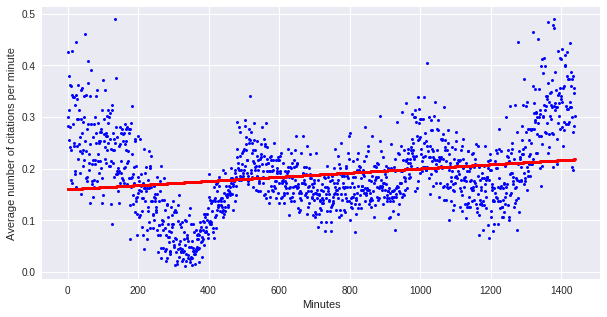

In [131]:
x = counts[["minutes"]]

# x = counts[['minutes', 'Gender']]
#'Commercial License' , 'Commercial Vehicle'

x['bias'] = np.ones(counts.shape[0])
y = counts.counts

beta = linear_regression(x,y)

test_x = test_counts[["minutes"]]

test_x['bias'] = np.ones(counts.shape[0])
test_y = test_counts.counts

pred = get_prediction(test_x, test_y,beta)

plt.figure(figsize=(10,5))
plt.plot(test_counts.minutes, test_y, 'bo', markersize=3)
plt.plot(test_counts.minutes, pred, 'ro', markersize=3)
plt.xlabel('Minutes')
plt.ylabel('Average number of citations per minute')
plt.savefig('gdrive/Team Drives/CSE544: Prob Stat Project/graphs/minute')

In [0]:
def sse(y,pred):
    return np.sum((y-pred)**2)

In [125]:
sse(test_y, pred)

8.611693129911297

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


SSE=8.769057894422383


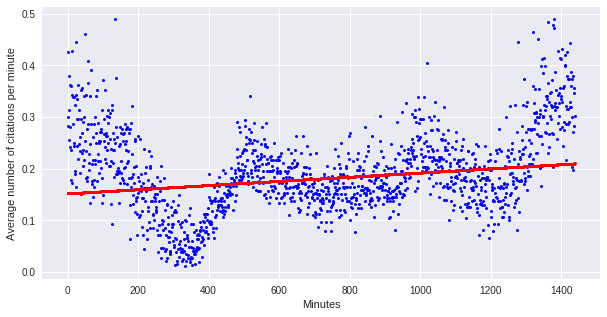

In [130]:
cols = ['Commercial Vehicle', "minutes"]

x = counts[cols]

x['bias'] = np.ones(counts.shape[0])
y = counts.counts

beta = linear_regression(x,y)

test_x = test_counts[cols]

test_x['bias'] = np.ones(counts.shape[0])
test_y = test_counts.counts

pred = get_prediction(test_x, test_y,beta)

print(f"SSE={sse(test_y, pred)}")

plt.figure(figsize=(10,5))
plt.plot(test_counts.minutes, test_y, 'bo', markersize=3)
plt.plot(test_counts.minutes, pred, 'ro', markersize=3)
plt.xlabel('Minutes')
plt.ylabel('Average number of citations per minute')
plt.savefig('gdrive/Team Drives/CSE544: Prob Stat Project/graphs/comm_vehicle_minutes')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


SSE=9.302357241538317


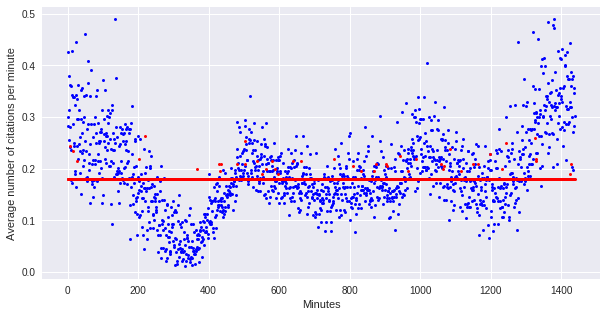

In [132]:
cols = ['Commercial Vehicle', "Alcohol"]

x = counts[cols]

x['bias'] = np.ones(counts.shape[0])
y = counts.counts

beta = linear_regression(x,y)

test_x = test_counts[cols]

test_x['bias'] = np.ones(counts.shape[0])
test_y = test_counts.counts

pred = get_prediction(test_x, test_y,beta)

print(f"SSE={sse(test_y, pred)}")

plt.figure(figsize=(10,5))
plt.plot(test_counts.minutes, test_y, 'bo', markersize=3)
plt.plot(test_counts.minutes, pred, 'ro', markersize=3)
plt.xlabel('Minutes')
plt.ylabel('Average number of citations per minute')
plt.savefig('gdrive/Team Drives/CSE544: Prob Stat Project/graphs/comm_vehicle_alcohol')

Hypothesis: Citstions depends upon time of the day and gender of the driver.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


SSE=1.3081645728071323


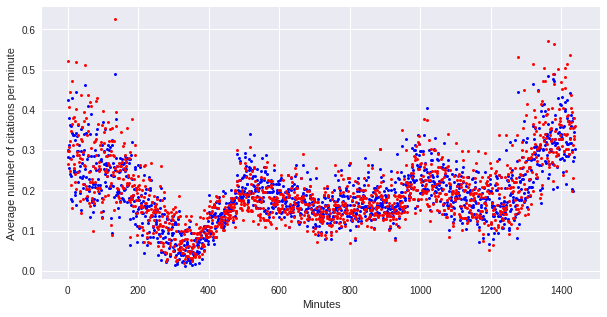

In [134]:
x = counts[["minutes","Gender"]]
x['bias'] = np.ones(counts.shape[0])
y = counts.counts
beta = linear_regression(x,y)
test_x = test_counts[["minutes","Gender"]]

test_x['bias'] = np.ones(counts.shape[0])
test_y = test_counts.counts

pred = get_prediction(test_x, test_y,beta)

print(f"SSE={sse(test_y, pred)}")
plt.figure(figsize=(10,5))
plt.plot(test_counts.minutes, test_y, 'bo', markersize=3)
plt.plot(test_counts.minutes, pred, 'ro', markersize=3)
plt.xlabel('Minutes')
plt.ylabel('Average number of citations per minute')
plt.savefig('gdrive/Team Drives/CSE544: Prob Stat Project/graphs/minute_gender')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


SSE=1.2439193255176941


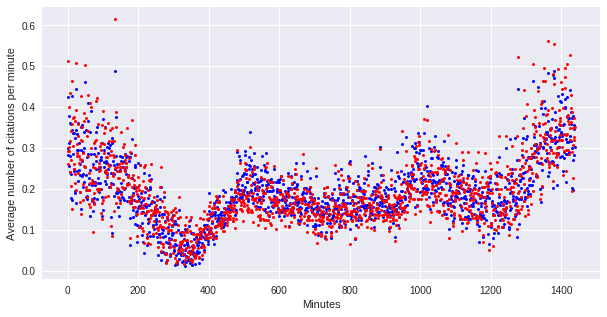

In [146]:
cols = ['Commercial Vehicle', 'Gender', "minutes"]

x = counts[cols]


x['bias'] = np.ones(counts.shape[0])
y = counts.counts

beta = linear_regression(x,y)

test_x = test_counts[cols]

test_x['bias'] = np.ones(counts.shape[0])
test_y = test_counts.counts

pred = get_prediction(test_x, test_y,beta)

print(f"SSE={sse(test_y, pred)}")
plt.figure(figsize=(10,5))
plt.plot(test_counts.minutes, test_y, 'bo', markersize=3)
plt.plot(test_counts.minutes, pred, 'ro', markersize=3)
plt.xlabel('Minutes')
plt.ylabel('Average number of citations per minute')
plt.savefig('gdrive/Team Drives/CSE544: Prob Stat Project/graphs/vehicle_gender_minutes')

Hypothesis: No of citations depends on root of time and in minutes and gender of driver

In [0]:
# Sqaure of time

In [0]:
#Generating additional features
x = pd.DataFrame({
    'bias': np.ones(counts.shape[0]),
    'minutes':counts.minutes,
    'p2': counts.minutes ** (0.5),
    "Gender": counts.Gender
  
    
})

test_x = pd.DataFrame({
    'bias': np.ones(test_counts.shape[0]),
    'minutes':test_counts.minutes,
    'p2': test_counts.minutes ** (0.5),
    "Gender": test_counts.Gender
})

[ 9.27252050e-01  1.36537741e+00 -2.76859533e-02  1.16324273e-04
 -7.99559237e-08]
SSE=1.2660128013719856
SSE=1.2660128013719856


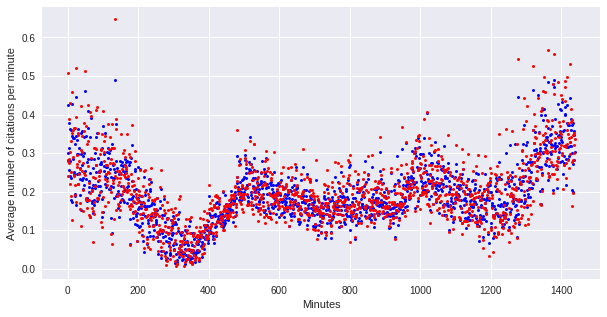

In [144]:
y = counts.counts

beta = linear_regression(x,y)
print(beta)

test_y = test_counts.counts

pred = get_prediction(test_x, test_y, beta)

print(f"SSE={sse(test_y, pred)}")

plt.figure(figsize=(10,5))

print(f"SSE={sse(test_y, pred)}")
plt.figure(figsize=(10,5))
plt.plot(test_counts.minutes, test_y, 'bo', markersize=3)
plt.plot(test_counts.minutes, pred, 'ro', markersize=3)
plt.xlabel('Minutes')
plt.ylabel('Average number of citations per minute')
plt.savefig('gdrive/Team Drives/CSE544: Prob Stat Project/graphs/ssquare_root')

SSE=1.2660128013719856


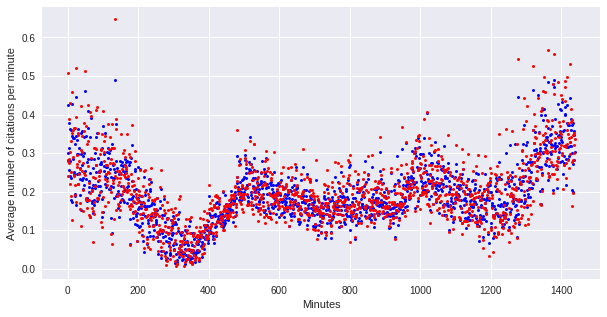

In [147]:
x = pd.DataFrame({
    'bias': np.ones(counts.shape[0]),
    'minutes':counts.minutes,
    'p2': counts.minutes ** (2),
    "Gender": counts.Gender,
    "Belts" : counts.Belts
  
    
})

test_x = pd.DataFrame({
    'bias': np.ones(test_counts.shape[0]),
    'minutes':test_counts.minutes,
    'p2': test_counts.minutes ** (2),
    "Gender": test_counts.Gender,
    "Belts" : test_counts.Belts
})

y = counts.counts

beta = linear_regression(x,y)

test_y = test_counts.counts

pred = get_prediction(test_x, test_y, beta)


print(f"SSE={sse(test_y, pred)}")
plt.figure(figsize=(10,5))
plt.plot(test_counts.minutes, test_y, 'bo', markersize=3)
plt.plot(test_counts.minutes, pred, 'ro', markersize=3)
plt.xlabel('Minutes')
plt.ylabel('Average number of citations per minute')
plt.savefig('gdrive/Team Drives/CSE544: Prob Stat Project/graphs/square_of_time')

[ 1.36762459e+00  1.40144248e+00  1.83684839e+00  2.00870327e-01
  3.16710687e-04 -1.44362562e-02]
SSE=4.345024823742483


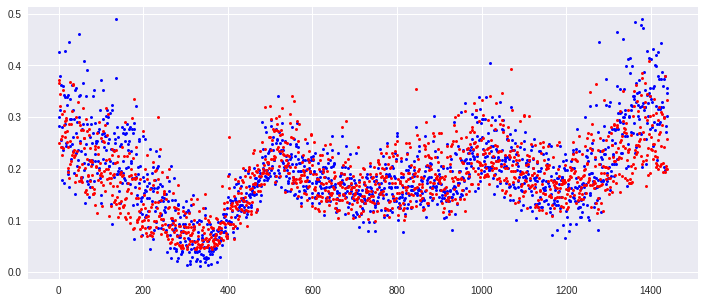

In [0]:
x = pd.DataFrame({
    'bias': np.ones(counts.shape[0]),
    'minutes':counts.minutes,
    'p2': counts.minutes ** (0.5),
#     'p3': counts.minutes ** 3,
#     'p5': counts.minutes ** 5
    "Gender": counts.Gender,
    "Belts" : counts.Belts,
    "Commercial License" : counts["Commercial License"]
  
    
})

test_x = pd.DataFrame({
    'bias': np.ones(test_counts.shape[0]),
    'minutes':test_counts.minutes,
    'p2': test_counts.minutes ** (0.5),
#     'p3': test_counts.minutes ** 3,
#     'p5': test_counts.minutes ** 5
    "Gender": test_counts.Gender,
    "Belts" : test_counts.Belts,
    "Commercial License" : counts["Commercial License"]
})

y = counts.counts

beta = linear_regression(x,y)
print(beta)

test_y = test_counts.counts

pred = get_prediction(test_x, test_y, beta)

print(f"SSE={sse(test_y, pred)}")

plt.figure(figsize=(12,5))
plt.plot(test_counts.minutes, test_y, 'bo', markersize=3)

plt.plot(test_counts.minutes, pred, 'ro', markersize=3)


[ 1.32387446e+00  1.37131418e+00  1.19966429e+00  1.82094765e+00
  2.03599031e-01  3.22496533e-04 -1.46948289e-02]
SSE=4.332404184210863


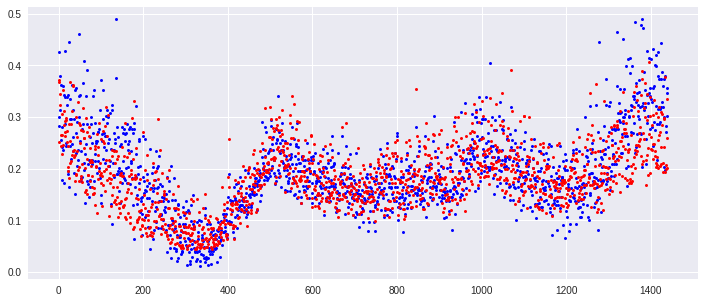

In [0]:
x = pd.DataFrame({
    'bias': np.ones(counts.shape[0]),
    'minutes':counts.minutes,
    'p2': counts.minutes ** (0.5),
#     'p3': counts.minutes ** 3,
#     'p5': counts.minutes ** 5
    "Gender": counts.Gender,
    "Belts" : counts.Belts,
    "Commercial License" : counts["Commercial License"],
    "Commercial Vehicle" : counts["Commercial Vehicle"]
  
  
    
})

test_x = pd.DataFrame({
    'bias': np.ones(test_counts.shape[0]),
    'minutes':test_counts.minutes,
    'p2': test_counts.minutes ** (0.5),
#     'p3': test_counts.minutes ** 3,
#     'p5': test_counts.minutes ** 5
    "Gender": test_counts.Gender,
    "Belts" : test_counts.Belts,
    "Commercial License" : counts["Commercial License"],
    "Commercial Vehicle" : counts["Commercial Vehicle"]
  
})

y = counts.counts

beta = linear_regression(x,y)
print(beta)

test_y = test_counts.counts

pred = get_prediction(test_x, test_y, beta)

print(f"SSE={sse(test_y, pred)}")

plt.figure(figsize=(12,5))
plt.plot(test_counts.minutes, test_y, 'bo', markersize=3)

plt.plot(test_counts.minutes, pred, 'ro', markersize=3)


[ 7.47859438e-02  1.32400333e+00  1.37254501e+00  1.19557769e+00
  1.82030083e+00  2.03634280e-01  3.22572899e-04 -1.46993507e-02]
SSE=4.332651126211696


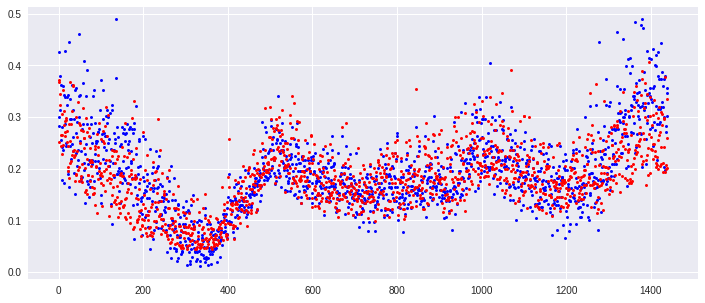

In [0]:
x = pd.DataFrame({
    'bias': np.ones(counts.shape[0]),
    'minutes':counts.minutes,
    'p2': counts.minutes ** (0.5),
#     'p3': counts.minutes ** 3,
#     'p5': counts.minutes ** 5
    "Gender": counts.Gender,
    "Belts" : counts.Belts,
    "Commercial License" : counts["Commercial License"],
    "Commercial Vehicle" : counts["Commercial Vehicle"],
    "Alcohol" : counts.Alcohol
  
  
    
})

test_x = pd.DataFrame({
    'bias': np.ones(test_counts.shape[0]),
    'minutes':test_counts.minutes,
    'p2': test_counts.minutes ** (0.5),
#     'p3': test_counts.minutes ** 3,
#     'p5': test_counts.minutes ** 5
    "Gender": test_counts.Gender,
    "Belts" : test_counts.Belts,
    "Commercial License" : counts["Commercial License"],
    "Commercial Vehicle" : counts["Commercial Vehicle"],
    "Alcohol" : counts.Alcohol
  
})

y = counts.counts

beta = linear_regression(x,y)
print(beta)

test_y = test_counts.counts

pred = get_prediction(test_x, test_y, beta)

print(f"SSE={sse(test_y, pred)}")

plt.figure(figsize=(12,5))
plt.plot(test_counts.minutes, test_y, 'bo', markersize=3)

plt.plot(test_counts.minutes, pred, 'ro', markersize=3)
